## Day 49 Lecture 1 Assignment

In this assignment, we will apply GMM (Gaussian Mixture Modeling) clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.special import entr
import seaborn as sns

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [2]:
# answer goes here
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv')
data.head(2)

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7


The goal is to cluster these player-seasons to identify potential player "archetypes".  
The pre-processing steps will be identical to what we previously did for K-means.

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [3]:
# answer goes here
df = data[data['G'] >= 20]
df = df[df['MP'] >= 10]

In [4]:
df.describe()

,Seas,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1519.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,2017.498111,26.571159,62.030227,31.221662,23.004975,3.730353,8.179345,0.455802,0.950441,2.666310,0.317276,2.781360,5.513539,0.499972,0.512951,1.646096,2.150504,0.753984,0.961020,3.215491,4.174307,2.208249,0.737028,0.463287,1.297607,1.936839,10.054975
std,1.104209,4.256946,17.245924,28.822906,7.226219,2.012994,4.251525,0.064486,0.786243,2.039581,0.112721,1.749147,3.335159,0.063380,0.051660,1.369560,1.686054,0.102346,0.791677,1.753534,2.395063,1.802760,0.396028,0.427924,0.766966,0.606692,5.650860
min,2016.000000,19.000000,20.000000,0.000000,10.000000,0.700000,1.700000,0.274000,0.000000,0.000000,0.000000,0.200000,0.300000,0.265000,0.325000,0.000000,0.100000,0.273000,0.000000,0.400000,0.600000,0.100000,0.000000,0.000000,0.100000,0.400000,1.700000
25%,2017.000000,23.000000,51.750000,4.000000,16.800000,2.200000,4.975000,0.413000,0.300000,1.100000,0.296500,1.500000,3.000000,0.459000,0.479000,0.700000,1.000000,0.699000,0.400000,2.000000,2.500000,1.000000,0.500000,0.200000,0.800000,1.500000,5.900000
50%,2017.000000,26.000000,67.000000,21.000000,22.550000,3.200000,7.100000,0.445000,0.800000,2.500000,0.343000,2.300000,4.600000,0.495000,0.512000,1.200000,1.600000,0.769000,0.700000,2.800000,3.600000,1.600000,0.700000,0.300000,1.100000,1.900000,8.600000
75%,2018.000000,29.000000,76.000000,59.000000,29.000000,4.900000,10.700000,0.487250,1.400000,3.900000,0.375500,3.700000,7.400000,0.538000,0.545000,2.000000,2.700000,0.828250,1.300000,4.000000,5.300000,2.800000,0.900000,0.600000,1.700000,2.400000,13.000000
max,2019.000000,42.000000,82.000000,82.000000,38.100000,10.800000,24.500000,0.716000,5.100000,13.200000,1.000000,9.700000,19.200000,0.800000,0.716000,9.700000,11.000000,1.000000,5.400000,11.100000,16.000000,11.700000,2.400000,3.700000,5.700000,3.900000,36.100000


Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [5]:
# answer goes here
X= df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']].copy()
X.head(2)

,PTS,TRB,AST,STL,BLK,TOV
0,5.3,1.5,0.6,0.5,0.2,0.5
2,3.2,1.8,1.9,0.4,0.1,0.8


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [6]:
# answer goes here
scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scale

,PTS,TRB,AST,STL,BLK,TOV
0,-0.841725,-1.116943,-0.892385,-0.598700,-0.61546,-1.040279
1,-1.213467,-0.991646,-0.171041,-0.851287,-0.84922,-0.649004
2,0.680646,2.224313,-0.337505,1.927166,1.25462,0.524821
3,-0.204454,1.305468,-0.004577,0.411646,0.78710,0.263971
4,1.990594,2.099016,0.106399,-0.598700,1.95590,0.655246
...,...,...,...,...,...,...
1583,-0.894831,-0.699286,-0.781409,-0.346114,-0.38170,-1.170704
1584,-0.487686,-0.991646,-0.892385,-0.851287,-0.84922,-0.909854
1585,0.893070,2.015485,-0.226529,1.927166,0.08582,0.785671
1586,-0.239858,0.846045,-0.670433,0.159060,1.02086,-0.518579


Run both K-Means and Gaussian mixtures modeling twice, once with 3 cluster and once with 7 clusters. Print out the resulting means for all 4 scenarios (KM+3, GMM+3, KM+7, GMM+7). When printing the means, transform the scaled versions back into their corresponding unscaled values. 

What "archetypes" do you see? Are the archetypes identified by GMM similar to those identified by K-Means? How do the means of GMM differ from those of K-Means?

In [7]:
# answer goes here

#k-means 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scale)
centers = kmeans.cluster_centers_
centers_unscaled = pd.DataFrame(scale.inverse_transform(centers), columns=X.columns)
centers_unscaled.style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV
0,18.122267,4.730364,5.376518,1.250202,0.415789,2.560729
1,7.128103,2.996028,1.548858,0.578550,0.302085,0.906852
2,12.913473,7.315569,1.853293,0.835329,0.984431,1.541617


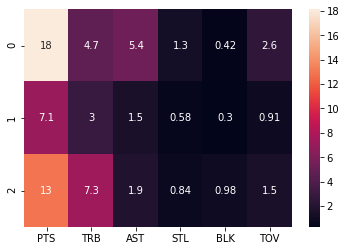

In [8]:
sns.heatmap(centers_unscaled, annot=True)

In [9]:
# k_means 7 clusters
kmeans2 = KMeans(n_clusters=7)
kmeans2.fit(X_scale)
centers = kmeans2.cluster_centers_
centers_unscaled = pd.DataFrame(scale.inverse_transform(centers), columns=X.columns)
centers_unscaled.style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV
0,23.438462,7.930769,7.533333,1.658974,0.833333,3.738462
1,13.326601,6.530542,2.057143,0.960099,0.603941,1.528571
2,5.790038,2.469349,1.113410,0.455747,0.218582,0.707854
3,16.610976,9.708537,2.064634,0.825610,1.670732,1.945122
4,10.340541,2.918018,2.898498,0.848348,0.229429,1.405706
5,18.136552,4.407586,5.487586,1.253793,0.363448,2.532414
6,7.159848,4.916288,1.075379,0.533712,0.759091,0.909848


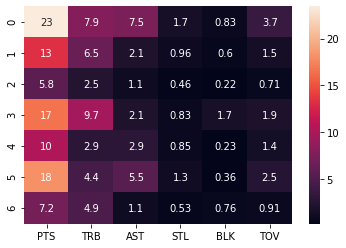

In [10]:
sns.heatmap(centers_unscaled, annot=True)

In [11]:
# GMM 3 clusters
gmm = GaussianMixture(n_components=3)
gmm.fit(X_scale)
means = gmm.means_
centers_unscaled = pd.DataFrame(scale.inverse_transform(means), columns=X.columns)
centers_unscaled.style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV
0,6.533558,2.904218,1.258084,0.507775,0.288764,0.802280
1,14.139678,3.779973,4.153778,1.040273,0.309581,1.961987
2,11.712536,6.691951,1.788547,0.806574,0.911540,1.438431


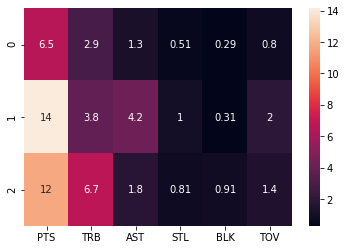

In [12]:
sns.heatmap(centers_unscaled, annot=True)

In [13]:
# GMM 7 clusters
gmm2 = GaussianMixture(n_components=7)
gmm2.fit(X_scale)
means2 = gmm2.means_
centers_unscaled = pd.DataFrame(scale.inverse_transform(means2), columns=X.columns)
centers_unscaled.style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV
0,5.519503,3.574663,0.771928,0.396049,0.458156,0.673743
1,20.605615,8.831556,6.925555,1.594160,0.981135,3.550959
2,9.356757,2.474084,2.827702,0.776734,0.172330,1.336355
3,15.456673,8.547290,2.698526,0.775599,1.325422,1.974072
4,16.607578,4.186050,4.659772,1.193751,0.391972,2.226349
5,10.683159,5.686564,1.594331,0.827493,0.626355,1.232886
6,6.447868,2.299811,1.230017,0.490389,0.196795,0.744643


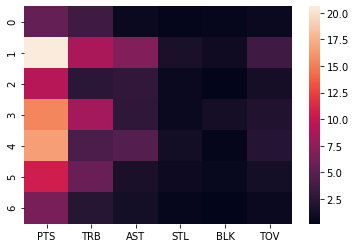

In [14]:
sns.heatmap(centers_unscaled)

Predict the likelihood of each player belonging to one of the 3 clusters using the GMM model. Then, calculate the entropy for each set of predicted probabilities. 

We will use entropy as a measure of how confident we are in the predicted class label. If we had no confidence in our prediction, we would assign 33% probability to each class, while if we were totally confident, we would assign 100% to one class. Entropy would be at a maximum in the "no confidence" scenario and a minimum in the "full confidence" scenario, which makes it a reasonable way to quantify our uncertainty in our prediction. There are certainly other methods as well; feel free to experiment with them if desired.

Which five predicted labels are we least confident about? Which five are we most confident about? Print out the associated details (season, player name, stats, etc.) from those players.

In [20]:
# answer goes here

pd.options.mode.chained_assignment = 'raise'
gmm = GaussianMixture(n_components=3)
gmm.fit(X_scale)
probs = gmm.predict_proba(X_scale)

entropy = entr(probs)

entropy_df = pd.DataFrame(entropy, columns=['cluster_0', 'cluster_1', 'cluster_2'])

indices = X.index
X_scale.index = indices
entropy_df.index = indices

X.loc[:, 'cluster'] = entropy_df.apply(lambda x: x.idxmin(), axis=1)
X.loc[:, 'entropy'] = entropy_df.apply(lambda x: x.min(), axis=1) 
X.loc[:, 'Player Name'] = data['Player']
X.sort_values(by='entropy')




,PTS,TRB,AST,STL,BLK,TOV,cluster,entropy,Player Name
426,7.3,6.4,0.6,0.8,2.4,0.5,cluster_2,-0.000000,Mitchell Robinson
2042,11.9,6.0,11.7,2.0,0.1,3.9,cluster_1,-0.000000,Rajon Rondo
2024,14.3,7.3,1.3,0.7,1.9,1.7,cluster_2,-0.000000,Kristaps Porziņģis
2012,19.5,4.2,10.0,2.1,0.2,2.6,cluster_1,-0.000000,Chris Paul
1192,28.0,11.8,2.1,1.3,2.2,2.4,cluster_2,-0.000000,Anthony Davis
...,...,...,...,...,...,...,...,...,...
1052,6.3,3.0,0.8,1.0,0.2,0.9,cluster_0,0.352736,Troy Williams
440,3.8,2.5,0.5,0.9,0.1,0.5,cluster_0,0.358037,Thabo Sefolosha
1157,8.9,3.8,1.0,1.1,0.4,0.8,cluster_1,0.359335,DeMarre Carroll
390,13.0,4.7,2.6,0.8,0.1,1.5,cluster_0,0.360904,Cedi Osman


In [16]:
X_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 0 to 2140
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PTS     1588 non-null   float64
 1   TRB     1588 non-null   float64
 2   AST     1588 non-null   float64
 3   STL     1588 non-null   float64
 4   BLK     1588 non-null   float64
 5   TOV     1588 non-null   float64
dtypes: float64(6)
memory usage: 86.8 KB


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 0 to 2140
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PTS      1588 non-null   float64
 1   TRB      1588 non-null   float64
 2   AST      1588 non-null   float64
 3   STL      1588 non-null   float64
 4   BLK      1588 non-null   float64
 5   TOV      1588 non-null   float64
 6   cluster  1157 non-null   object 
 7   entropy  1157 non-null   float64
dtypes: float64(7), object(1)
memory usage: 111.7+ KB
